In [2]:
from collections import Counter

def analysis(array):
    return Counter(array)

In [3]:
fileContent = []

with open('txtfile.txt') as f:
    lines = f.readlines()
    for line in lines:
        if not line.startswith('\n') and not line.startswith('#'):
            fileContent.append(line)
        if line == "# page 119 and 120":
            break

In [5]:
words = []
for line in fileContent:
    lineWords = line.replace("\n", "").split(',')
    for word in lineWords:
        words.append(word)

In [6]:
counter = analysis(words)

In [22]:
mostCommon = counter.most_common()
zipf = {}

for (k, v) in mostCommon:
    if v not in zipf.keys():
        zipf[v] = [k]
    else:
        zipf[v].append(k)

result = {}
for i, (k, v) in enumerate(zipf.items()):
    for word in v:
        result[word] = k * (i + 1)

print(result)

#print(zipf)

{'8AM': 801, 'TC8G': 906, '4ODAM': 1230, 'SC8G': 1620, 'OE': 1905, 'TOE': 2274, 'AM': 2366, 'TCG': 2552, '4ODCC8G': 2673, '4ODCCG': 2700, 'ODAM': 2838, 'SCG': 2838, 'OR': 3084, '4ODC8G': 3084, '8AR': 3198, 'AR': 3108, '2AM': 3075, 'TOR': 3264, '8AE': 3434, 'OHAM': 3240, 'SOE': 3363, '4ODAE': 3363, 'TCCG': 3160, '4OE': 3160, 'TCOE': 3150, 'AE': 3146, 'ODCCG': 3266, '4ODAR': 3336, 'SCCG': 3225, 'OHC8G': 3225, 'TDZG': 3328, 'TG': 3375, '8AM-': 3444, '8G': 3480, 'T8G': 3540, 'SO': 3540, 'DAM': 3627, '4ODG': 3712, 'OHAR': 3712, 'OHAE': 3795, 'ODAE': 3740, '4OHAM': 3740, '2': 3745, 'ODAR': 3816, 'RAM': 3774, '4ODCG': 3838, 'SCOE': 3861, 'ODC8G': 3861, 'ETC8G': 3861, '8OE': 3920, 'OHCCG': 3895, 'SG': 3895, 'ODCC8G': 3864, '4OHC8G': 3913, 'SOR': 3960, '8AIR': 3960, 'HZG': 3910, '4ODOE': 3901, '8G-': 3936, 'TCOR': 3969, 'OHCC8G': 3969, '2OE': 3950, 'SCC8G': 3950, '8AN': 3774, 'TO8G': 3796, 'TCO': 3710, 'OHG': 3710, 'THZG': 3726, '4OHCC8G': 3685, '4OHG': 3696, '4ODTG': 3696, '2AR': 3696, 'SDZG':

<BarContainer object of 8453 artists>

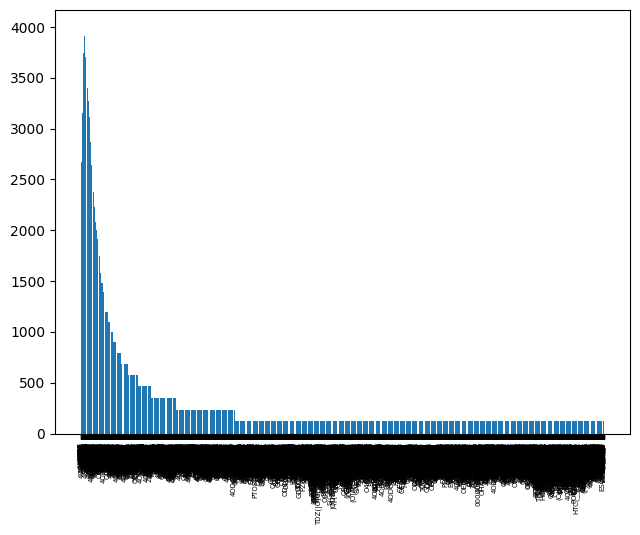

In [30]:
import matplotlib.pyplot as plt

plt.xticks(rotation=90, fontsize=5)
plt.tight_layout()
plt.bar(result.keys(), result.values())